<h2 align='center'> Cyclistic: a bike-share program </h2>

<h4 align='center'> (Part 2: Data Analysis & Visualization) </h4>

### 1. Import libraries and datasets

In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [12, 12]
mpl.rcParams['figure.dpi'] = 72

In [2]:
# import all cleaned datasets

c_bt_202004 = pd.read_csv('/home/eemonte/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202004.csv', 
                          parse_dates=["started_at", "ended_at"])
c_bt_202005 = pd.read_csv('/home/eemonte/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202005.csv', 
                          parse_dates=["started_at", "ended_at"])
c_bt_202006 = pd.read_csv('/home/eemonte/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202006.csv', 
                          parse_dates=["started_at", "ended_at"])
c_bt_202007 = pd.read_csv('/home/eemonte/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202007.csv', 
                          parse_dates=["started_at", "ended_at"])
c_bt_202008 = pd.read_csv('/home/eemonte/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202008.csv', 
                          parse_dates=["started_at", "ended_at"])
c_bt_202009 = pd.read_csv('/home/eemonte/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202009.csv', 
                          parse_dates=["started_at", "ended_at"])
c_bt_202010 = pd.read_csv('/home/eemonte/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202010.csv', 
                          parse_dates=["started_at", "ended_at"])
c_bt_202011 = pd.read_csv('/home/eemonte/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202011.csv', 
                          parse_dates=["started_at", "ended_at"])
c_bt_202012 = pd.read_csv('/home/eemonte/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202012.csv', 
                          parse_dates=["started_at", "ended_at"])
c_bt_202101 = pd.read_csv('/home/eemonte/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202101.csv', 
                          parse_dates=["started_at", "ended_at"])
c_bt_202102 = pd.read_csv('/home/eemonte/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202102.csv', 
                          parse_dates=["started_at", "ended_at"])
c_bt_202103 = pd.read_csv('/home/eemonte/00_PROJECTS/cs_1_bike_share/cleaned_datasets/bt_202103.csv', 
                          parse_dates=["started_at", "ended_at"])

### 2. Aggregatre 12 datasets into a final dataset

In [3]:
frames = [c_bt_202004, c_bt_202005, c_bt_202006, c_bt_202007, c_bt_202008, c_bt_202009, 
          c_bt_202010, c_bt_202011, c_bt_202012, c_bt_202101, c_bt_202102, c_bt_202103]

biketrips = pd.concat(frames)

biketrips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual


### 3. Analyze this dataset

**Note**: For the following analysis, I will trim the dataset "biketrips" by deleting the "start_station_name", "end_station_name", "start_lat", "start_lng", "end_lat", "end_lng" columns for now.

In [4]:
sub_biketrips = biketrips[['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_id', 
                           'end_station_id', 'member_casual']]

<h4 style="color:green;"> (3-1) Calculate the length of each ride </h4>

In [5]:
# check if there is invalid ride where its end time is earlier than or equal to its start time
filt = (sub_biketrips['ended_at'] <= sub_biketrips['started_at'])
sub_biketrips[filt]

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,member_casual
2419,7C1E92200AEFF70E,docked_bike,2020-04-27 17:20:30,2020-04-27 17:20:18,211,91,member
2500,671BB1F73F4CD303,docked_bike,2020-04-20 16:51:18,2020-04-20 16:51:05,334,2,casual
3132,502B972C6B1FCAE6,docked_bike,2020-04-12 19:09:54,2020-04-12 19:09:40,301,289,member
3538,68E70FDF06F0A439,docked_bike,2020-04-29 17:37:11,2020-04-29 17:37:07,37,442,member
8203,6EB323BCC83A9D1D,docked_bike,2020-04-05 15:46:12,2020-04-05 15:46:11,471,163,member
...,...,...,...,...,...,...,...
16653,D69558609E2E6E5B,classic_bike,2021-02-13 17:32:01,2021-02-13 17:32:01,172,172,member
39311,F79335E3A77A57B5,electric_bike,2021-03-29 15:41:21,2021-03-29 15:41:20,246,246,member
49961,48013AE627711DB0,classic_bike,2021-03-24 19:32:44,2021-03-24 19:32:44,156,156,member
58850,650661065904F60B,classic_bike,2021-03-05 08:10:51,2021-03-05 08:10:51,334,334,member


In [6]:
# drop these rides
sub_biketrips = sub_biketrips[sub_biketrips['ended_at'] > sub_biketrips['started_at']]

In [7]:
# create a column "ride_length" by subtracting "ended_at" from "started_at"
sub_biketrips.insert(4, "ride_length", sub_biketrips['ended_at'] - sub_biketrips['started_at'])

<h4 style="color:green;"> (3-2) Calculate the day of the week that each ride started </h4>

**Note**: I will use isoweekday( ) to get the days of the week -- 1 to 7 corresponding to Monday to Sunday.

In [8]:
# create a column "iso_day_of_week_started" that calculate the day of the week each ride started
import datetime

iso_days = sub_biketrips['started_at'].apply(lambda x: x.isoweekday())
sub_biketrips.insert(3, "iso_day_of_week_started", iso_days)

<h4 style="color:green"> (3-3) Divide this dataset based on member riders versus casual riders </h4>

In [9]:
# create a sub dataframe contains all membership rides
members = sub_biketrips.groupby(['member_casual']).get_group('member')

# create a sub dataframe contains all casual user rides
casual_riders = sub_biketrips.groupby(['member_casual']).get_group('casual')

<IPython.core.display.Javascript object>


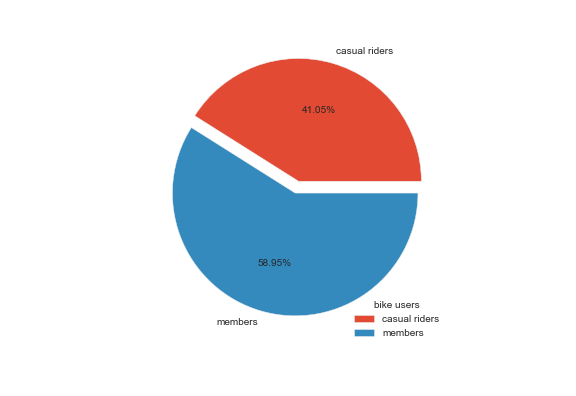

In [62]:
# plot: The total number of members versus the total number of casual riders
%matplotlib notebook

plt.pie(np.array([len(casual_riders), len(members)]), 
        labels=['casual riders', 'members'], 
        explode=[0.1, 0], 
        autopct='%1.2f%%')
plt.style.use('ggplot')
plt.legend(title='bike users', loc='lower right')
plt.show()

<h4 style="color:green;"> (3-4) Calculate the minimum, maximum, and average ride_length for members versus casual riders </h4>

In [10]:
# calculate the minimum, the maximum, and the average value of ride length for members
members_ride_length_min = members['ride_length'].min()
members_ride_length_max = members['ride_length'].max()
members_ride_length_avg = members['ride_length'].mean()

# calculate the minimum, the maximum, and the average value of ride length for casual riders
casual_ride_length_min = casual_riders['ride_length'].min()
casual_ride_length_max = casual_riders['ride_length'].max()
casual_ride_length_avg = casual_riders['ride_length'].mean()

<h4 style="color:green;"> (3-6) How do members versus casual riders use bikes based on the days of a week which the rides started? </h4>

In [11]:
l = [1, 2, 3, 4, 5, 6, 7]

# for members: create a dict, calculate the total amount of rides on each day of a week
members_rides_day = dict()
s_members_rides_day = members['iso_day_of_week_started'].value_counts()
for e in l:
    members_rides_day[e] = s_members_rides_day.loc[e]

# for casual riders: create a dict, calculate the total amount of rides on each day of a week
casual_rides_day = dict()
s_casual_rides_day = casual_riders['iso_day_of_week_started'].value_counts()
for e in l:
    casual_rides_day[e] = s_casual_rides_day.loc[e]

<IPython.core.display.Javascript object>


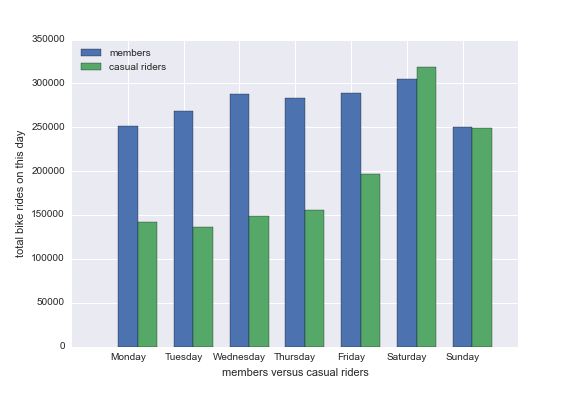

In [57]:
# plot: How do members versus casual riders use bikes based on the days of a week which the rides started?
%matplotlib notebook

wid = 0.35
x_indexes = np.arange(len(members_rides_day.keys()))

plt.bar(x_indexes, members_rides_day.values(), width=wid, label='members')
plt.bar(x_indexes+wid, casual_rides_day.values(), width=wid, label='casual riders')

plt.xticks(ticks=x_indexes, labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xlabel("members versus casual riders")
plt.ylabel("total bike rides on this day")
plt.style.use("seaborn")
plt.legend(loc='upper left')
plt.show()

<h4 style="color:green;"> (3-7) How do members versus casual riders use bikes based on the types of bikes? </h4>

<h4 style="color:green;"> (3-5) Calculate the average ride_length by day_of_week_started for members versus casual riders </h4>